In [1]:
# #%% Setup.

# # Activate environment.
# ! . ~/env/bin/activate

# # Install requirements.

# ! pip install --upgrade numpy torch scipy sklearn nibabel nilearn matplotlib

## Imports

ARDENT is a pip-installable pure-python package in development for image registration.

Straightforward and streamlined for users with no image registration experience.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([i == j or i == 19-j for i in range(20) for j in range(20)]).reshape(20, 20)


f, axs = plt.subplots(2, 4, figsize=(10, 6), facecolor='b')
for row in range(2):
    for col in range(4):
        ax = axs[row, col]
        ax.imshow(grid, aspect='auto')
#         plt.subplots_adjust(left=.2)
        if (row, col) == (1, 0):
            axpos = ax.get_position()
            ax.set_position([axpos.xmin+.1, axpos.ymin, axpos.width, axpos.height])
            ax.set_aspect('auto')
        if (row, col) == (1, 3): 
            axpos = ax.get_position()
            ax.set_position([axpos.xmin, axpos.ymin, axpos.width*1.1, axpos.height])
            ax.set_aspect('auto')
        if (row, col) == (0, 0): 
            axpos = ax.get_position()
            ax.set_position([axpos.xmin, axpos.ymin+.2, axpos.width*.4, axpos.height*.7])
            ax.set_aspect('auto')
            print(ax.get_position())
        

Bbox(x0=0.125, y0=0.73, x1=0.1923913043478261, y1=0.975)


0.22878787878787882


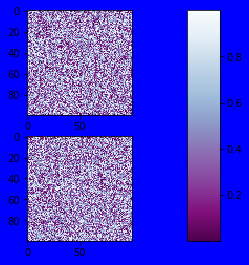

In [3]:
plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
ax = plt.gca()
pos = ax.get_position(); print(pos.width)
ax.set_position([pos.xmin, pos.ymin, .1, pos.height])
# ax.set_aspect(1.5)
# ax.set_aspect('auto')
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.gcf().set_facecolor('blue')
plt.subplots_adjust(left=0.4, bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [4]:
#%% Imports.

import numpy as np
import ardent

import matplotlib
%matplotlib inline

ImportError: dlopen(/usr/local/lib/python3.7/site-packages/torch/_C.cpython-37m-darwin.so, 9): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /usr/local/lib/python3.7/site-packages/torch/lib/libshm.dylib
  Reason: image not found

# Prepare template and target

### Load template and target arrays from file.

Note: in this demo we use the Allen mouse brain atlas for the template, and thus the words 'atlas' and 'template' are effectively interchangable hereafter.

'atlas' is used in the code of this demo, whereas 'template' is used internally to ardent.

In [7]:
#%% Load template and target.
# Using this data from the ARDENT package expects that you have cloned the ARDENT repo rather than just downloading this demo.ipynb file.
# If you have your own data, feel free to pull it in by file name, or use numpy arrays directly in the Transform.register call.

directory_path = './demo_data/'
atlas_image_file_name = 'average_template_100.nrrd'
target_image_file_name = 'thy1eyfp_preprocessed_50um_float32.tif' # old local demo target: '180517_Downsample.img'

atlas_file_name = directory_path + atlas_image_file_name
target_file_name = directory_path + target_image_file_name

atlas = ardent.load(atlas_file_name)
target = ardent.load(target_file_name)

NameError: name 'ardent' is not defined

In [6]:
# downsample_image function transcribed from ss module.
def downsample_image(I, down):
    '''Downsample an image by averaging.
    down should either be a triple or a single number.'''
    
    try:
        # Check if down is an iterable with 3 elements
        d0 = down[2]
    except TypeError:
        down = [down, down, down]
    
    down = np.array(down).astype(int)
    nx = I.shape
    nxd = (nx // down).astype(int)
    Id = np.zeros(nxd)
    
    for i in range(down[0]):
        for j in range(down[1]):
            for k in range(down[2]):
                Id += I[i:nxd[0]*down[0]:down[0], j:nxd[1]*down[1]:down[1], k:nxd[2]*down[2]:down[2]]
    Id = Id/down[0]/down[1]/down[2]
    
    return Id

target = downsample_image(target, 2)

NameError: name 'target' is not defined

### Preprocess template and target 

In [ ]:
#%% Reform and normalize images.

atlas = ardent.basic_preprocessing(atlas)
target = ardent.basic_preprocessing(target)

# If you are wondering, the above does the same thing as below:
'''
# Normalize.
# Compute mean absolute deviation.
atlas_mean_absolute_deviation = np.mean(np.abs(atlas - np.median(atlas)))
target_mean_absolute_deviation = np.mean(np.abs(target - np.median(target)))
# Subtract mean.
atlas -= np.mean(atlas)
target -= np.mean(target)
# Divide by mean absolute deviation.
atlas /= atlas_mean_absolute_deviation
target /= target_mean_absolute_deviation

# Pad with zeros.
atlas = np.pad(atlas, pad_width=5, mode='constant', constant_values=0)
target = np.pad(target, pad_width=5, mode='constant', constant_values=0)
'''

## Orient target to template

### Visualize images

In [ ]:
#%% Visualize images before registration.
# It is important to check that the images are oriented to one another 
# and do not require rotating or flipping.

ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(target, title='target', limit_mode='stdev')

### Reorient target and revisualize

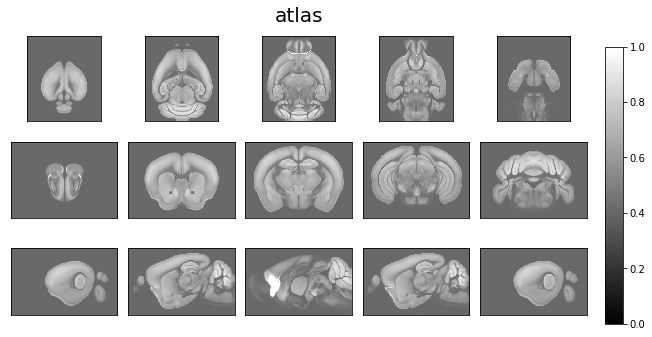

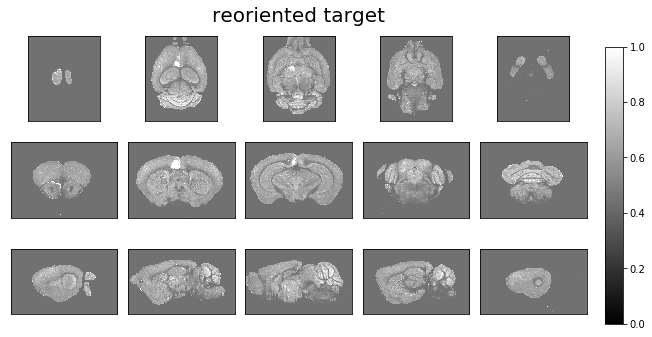

In [6]:
#%% Orient images.
# From looking at the two images we can see that they are not oriented.
# This must be corrected prior to performing the registration.

# Here we will orient the target to the template (atlas).
reoriented_target = np.copy(target)
# reoriented_target = np.rot90(reoriented_target, axes=(1,2))
# reoriented_target = np.rot90(reoriented_target, axes=(2,0))
# # np.moveaxis does nothing when destination == source.
# # reoriented_target = np.moveaxis(reoriented_target, source=[0,1,2], destination=[0,1,2])
# reoriented_target = np.flip(reoriented_target, axis=0)
# reoriented_target = np.flip(reoriented_target, axis=1)

# If we performed an odd number of inversions with the above lines, 
# we must perform a flip to correct for inverting the image. 
# The simplest flip is a sagittal flip, since that is the axis of innate symmetry in the brain.
# In this case, we can see from the atlas visualization that this is axis 2 (the last row).
# The above lines performed 2 inversions, so the following line is commented out.
# reoriented_target = np.flip(reoriented_target, axis=2)

# Verify proper orientation.
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(reoriented_target, title='reoriented target', limit_mode='stdev')

### Use reoriented target

In [7]:
#%% Use reoriented target.
# Once we've finished orienting target, we use the result as target.
# A copy is taken to get a real array rather than a view.
target = reoriented_target.copy()

# Perform registration

In [8]:
#%% Perform registration.

import torch
torch.cuda.empty_cache()

# Instantiate Transform object.
transform = ardent.Transform()

transform.register(template=atlas, target=target, preset='clarity', sigmaR=1e1, eV=1e0/2, eL=5e-8/2, eT=5e-5/2, tune=True, naffine=50, niter=200)


Current parameters:
>    a               = 2 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 5 (number of iterations)
>    epsilon         = 0.1 (gradient descent step size)
>    epsilonL        = 0 (gradient descent step size, affine)
>    epsilonT        = 0 (gradient descent step size, translation)
>    minbeta         = 1e-15 (smallest multiple of epsilon)
>    sigma           = 1.0 (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 1000000.0 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 1 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (index of CUDA_VISIBLE_

/home/dcrowley/ARDENT_gpu_test/ardent/ardent/lddmm/torch_lddmm_stable.py:564: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.It[ii][i] = torch.tensor(self.I[ii][:,:,:]).type(self.params['dtype']).cuda()


iter: 0, E = 16586394.0000, ER = 0.0000, EM = 16586394.0000, epd = 0.100000.
iter: 1, E= 16564784.000, ER= 0.000, EM= 16564784.000, epd= 0.100, time= 2.61.
iter: 2, E= 16543336.000, ER= 0.000, EM= 16543336.000, epd= 0.100, time= 2.62.
iter: 3, E= 16522044.000, ER= 0.000, EM= 16522044.000, epd= 0.100, time= 2.62.
iter: 4, E= 16500914.000, ER= 0.000, EM= 16500914.000, epd= 0.100, time= 2.62.


# Apply transformation

In [9]:
#%% Apply the transformation.
# The transformation is the result of the registration, and it can be applied to arbitrary images, 
# although presently they should be preprocessed as the atlas and target were.
# Here we will simply apply the transformation to both the atlas and target, 
# making them match up with each other.
# i.e. deformed_target should resemble atlas, and deformed_atlas should resemble target.

directory_path = "/home/dcrowley/image_lddmm_tensorflow/"
output_directory_path = directory_path + "demo_outputs/"
deformed_atlas_file_name = output_directory_path + 'deformed_atlas'
deformed_target_file_name = output_directory_path + 'deformed_target'

deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target', save_path=deformed_atlas_file_name)
deformed_target = transform.apply_transform(subject=target, deform_to='template', save_path=None)

ardent.save(deformed_target, deformed_target_file_name)

# Note: deformed_atlas is saved in the apply_transform call by providing a path for save_path.
# Note: deformed_target is saved after-the-fact with ardent.save(data, file_path).

# Visualize results

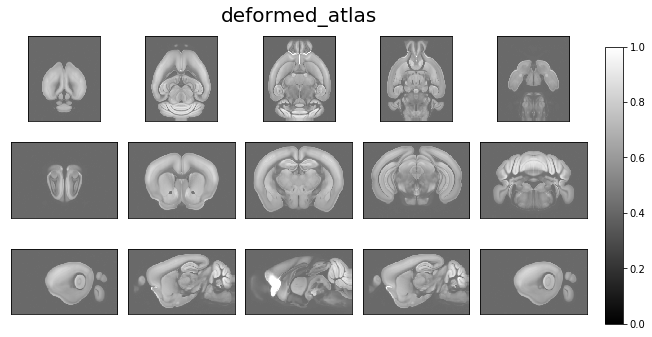

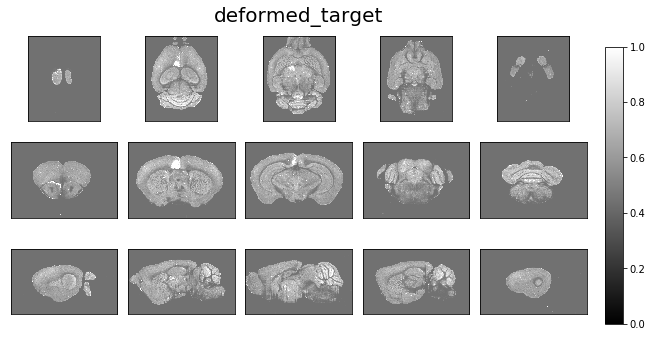

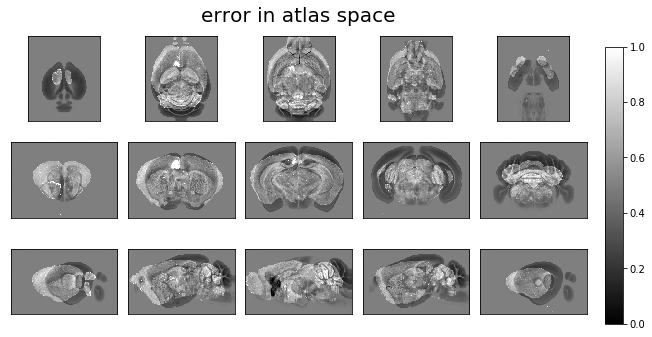

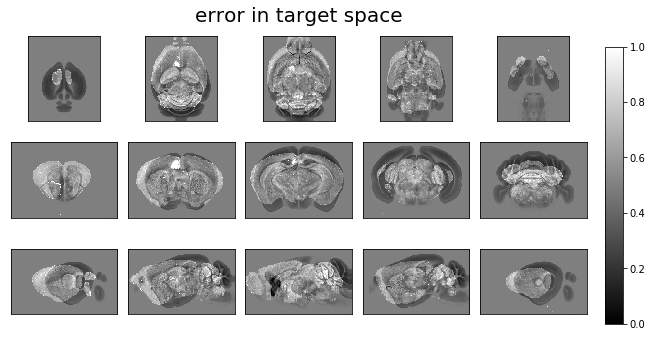

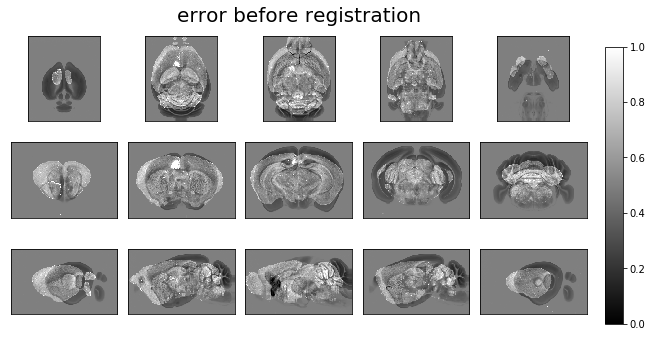

In [10]:
#%% Visualize results.

ardent.heatslices(deformed_atlas, title='deformed_atlas', limit_mode='stdev')
ardent.heatslices(deformed_target, title='deformed_target', limit_mode='stdev')

# To simply visualize error we plot the difference between images.
ardent.heatslices(deformed_target - atlas, title='error in atlas space', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error in target space', limit_mode='stdev')
ardent.heatslices(target - atlas, title='error before registration', limit_mode='stdev')



del transform
transform = ardent.Transform()
transform.register(template=atlas, target=target, eV=0, sigmaR=0, naffine=0, niter=1, eT=0, eL=0)
atlas_in_target = transform.apply_transform(subject=atlas, deform_to='target')
target_in_atlas = transform.apply_transform(subject=target, deform_to='template')
ardent.heatslices(target - atlas_in_target, title='error before registration in target space', limit_mode='stdev')
ardent.heatslices(target_in_atlas - atlas, title='error before registration in atlas space', limit_mode='stdev')

In [1]:
ardent.heatslices(np.stack([np.zeros_like(target), deformed_atlas, target], axis=-1), title='error in target space', limit_mode='stdev')
ardent.heatslices(np.stack([target, deformed_atlas, target], axis=-1), title='error in target space', limit_mode='stdev')

NameError: name 'ardent' is not defined

# Save the registration

In [11]:
transform_file_name = output_directory_path + 'transform_file'

transform.save(transform_file_name)

# Load the registration

In [26]:
# Make a new Transform object.
loaded_transform = ardent.Transform()

# Load the attributes from the saved transform
loaded_transform.load(transform_file_name)

# Verify that loaded_transform has the same attribute values as transform, except for lddmm.
print(
    np.array_equal(transform.phis, loaded_transform.phis),
    np.array_equal(transform.phiinvs, loaded_transform.phiinvs),
    np.array_equal(transform.Aphis, loaded_transform.Aphis),
    np.array_equal(transform.phiinvAinvs, loaded_transform.phiinvAinvs),
    np.array_equal(transform.affine, loaded_transform.affine),
sep='\n')

# Note: unfortunately, the present implementation requires Transform objects 
# to perform their register method before running their apply_transform method.

# This means that loaded_transform cannot use apply_transform without first running its register method, 
# so loading a Transform object from file as we just did only acts to fetch the attributes.

True
True
True
True
True
